<a href="https://colab.research.google.com/github/coder360-crypto/Pixel-segmentation-using-K-Means/blob/main/neural_art_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#using scikit learn

In [40]:
import numpy as np
from sklearn.cluster import KMeans
from skimage.io import imread
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()

Saving mor.jpeg to mor (1).jpeg


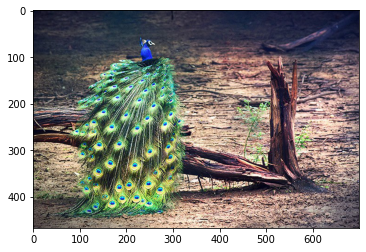

In [ ]:
sample_img = imread('mor.jpeg')
plt.imshow(sample_img)

In [ ]:
n_colors = 10  #number of clusters u can increase the clusters number
w,h,_ = sample_img.shape
sample_img = sample_img.reshape((-1,3))
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(sample_img)

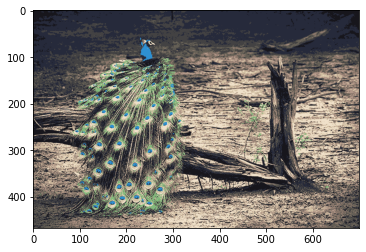

In [ ]:
labels = kmeans.predict(sample_img)
identified_p = np.array(kmeans.cluster_centers_).astype(int)
recolored_img = np.copy(sample_img)
#restoring image
for index in range(len(recolored_img)):
    recolored_img[index] = identified_p[labels[index]]
# reshape for display
recolored_img = recolored_img.reshape(w,h,3)
plt.imshow(recolored_img)

In [ ]:
#using numpy and matplotlib and opencv (for BGR to RGB conversion and also for defining criteria for k-means )

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files
from IPython.display import Image

In [4]:
uploaded = files.upload()

Saving iitkgp.jpg to iitkgp.jpg


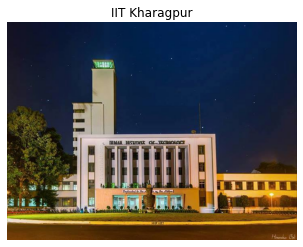

In [39]:
image = cv2.imread('iitkgp.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.title("IIT Kharagpur")
plt.imshow(image)

In [6]:
pixel_vals = image.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)

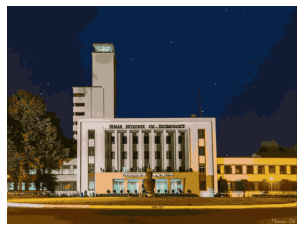

In [9]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
n = 20
list=[]
for i in range(1,n):
  retval, labels, centers = cv2.kmeans(pixel_vals, i, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  centers = np.uint8(centers)
  segmented_data = centers[labels.flatten()]
  segmented_image = segmented_data.reshape((image.shape))
  list.append(segmented_image)
 
for segmented_image in list:
 plt.axis('off')
 plt.imshow(segmented_image)

In [10]:
len(list)

19

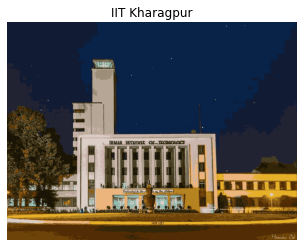

In [38]:
plt.axis('off')
plt.title("IIT Kharagpur")
plt.imshow(list[18])